In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline 

## Importando base de dados

In [4]:
fashion_mnist = keras.datasets.fashion_mnist


In [5]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
print(X_train_full.shape)
print(y_train_full.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [7]:
# Transformar a escala para que os valores fiquem entre 0 e 1
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [9]:
nomes_classes = ["camisa/top", "calca", "casaco", "vestido", "jaqueta", 
               "sandalia", "camiseta", "tenis", "bolsa", "bota"]

In [10]:
nomes_classes[y_train[0]]

'jaqueta'

In [11]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.17254902, 0.49803922, 0.71372549, 0.7254902 ,
        0.63137255, 0.47058824, 0.21568627, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.16470588,
        0.77647059, 0.98431373, 1.        , 0.98431373, 0.97647059,
        0.96862745, 1.    

bota


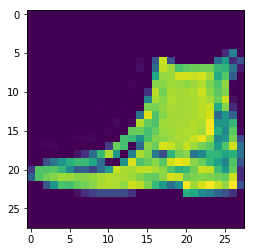

In [14]:
exemplo_n = 5
print(nomes_classes[y_train[exemplo_n]])
plt.imshow(X_train[exemplo_n], interpolation='nearest')
plt.show()

## Criando um modelo com Keras

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dropout(rate=0.1))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
__________________________________________________

## Compilando o modelo

In [17]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

## Treinar o modelo

In [18]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 14s 262us/sample - loss: 0.7851 - accuracy: 0.7369 - val_loss: 0.5257 - val_accuracy: 0.8180
Epoch 2/5
55000/55000 [==============================] - 14s 256us/sample - loss: 0.5303 - accuracy: 0.8159 - val_loss: 0.4461 - val_accuracy: 0.8478
Epoch 3/5
55000/55000 [==============================] - 13s 232us/sample - loss: 0.4734 - accuracy: 0.8349 - val_loss: 0.4284 - val_accuracy: 0.8516
Epoch 4/5
55000/55000 [==============================] - 14s 258us/sample - loss: 0.4419 - accuracy: 0.8443 - val_loss: 0.3991 - val_accuracy: 0.8590
Epoch 5/5
55000/55000 [==============================] - 12s 218us/sample - loss: 0.4157 - accuracy: 0.8510 - val_loss: 0.3753 - val_accuracy: 0.8690


## Visualizar a performance

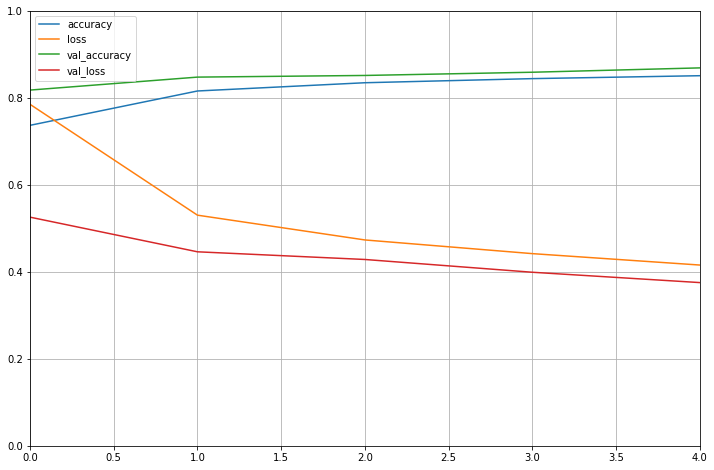

In [19]:
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

## Avaliar o modelo

In [20]:
# prints the loss and the accuracy
model.evaluate(X_test, y_test,verbose=1)

10000/10000 [==============================] - 1s 137us/sample - loss: 65.6357 - accuracy: 0.8148


[65.63566342315674, 0.8148]

## Prever

In [21]:
X_novo = X_test[:4]
y_proba = model.predict(X_novo)
y_proba

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [22]:
y_pred = model.predict_classes(X_novo)
print(y_pred)
print(np.array(nomes_classes)[y_pred])

[9 2 1 1]
['bota' 'casaco' 'calca' 'calca']


## Verificar os resultados

In [23]:
y_novo = y_test[:4]
print(y_novo)
np.array(nomes_classes)[y_pred]

[9 2 1 1]


array(['bota', 'casaco', 'calca', 'calca'], dtype='|S10')

calca


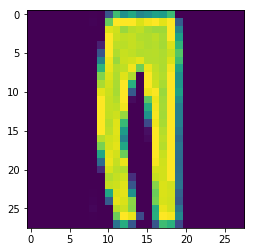

In [25]:
# example_n = 201
print(nomes_classes[y_pred[2]])
plt.imshow(X_novo[2], interpolation='nearest')
plt.show()

## O nosso simples modelo acertou esses 4 exempls